# import dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras as K

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D
from keras.datasets import mnist
from keras.utils import np_utils

plt.rcParams['figure.figsize'] = (9, 9)
%matplotlib inline

Using TensorFlow backend.


# load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


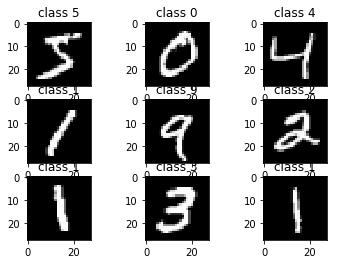

In [3]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title('class {}'.format(y_train[i]))

# format data to vectors

In [4]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

#normalization
X_train /= 255
X_test /= 255

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# One-Hot Encoding target classes

In [5]:
Y_train = np_utils.to_categorical(y_train, num_classes=10)
Y_test = np_utils.to_categorical(y_test, num_classes=10)

# Building NN

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784, )))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

# Compile the model

In [7]:
model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

In [8]:
model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=4,
    verbose=1,
    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 296s 5ms/step - loss: 0.2497 - acc: 0.9241 - val_loss: 0.0957 - val_acc: 0.9700
Epoch 2/4
60000/60000 [==============================] - 3s 47us/step - loss: 0.0996 - acc: 0.9696 - val_loss: 0.0829 - val_acc: 0.9746
Epoch 3/4
60000/60000 [==============================] - 3s 47us/step - loss: 0.0690 - acc: 0.9783 - val_loss: 0.0695 - val_acc: 0.9787
Epoch 4/4
60000/60000 [==============================] - 3s 46us/step - loss: 0.0548 - acc: 0.9821 - val_loss: 0.0626 - val_acc: 0.9795


# Evaluating

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('test score:', score[0])
print('test accuracy:', score[1])

test score: 0.06263640064769424
test accuracy: 0.9795
